In [92]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import pathlib
from tensorflow.keras import layers

# DOWNLOAD THE DATA.

In [93]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/sarth/.keras/datasets/flower_photos')

# Making Train and Validation split

In [97]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("flower_photos",
                                                              validation_split=0.2,
                                                              subset='training',
                                                              seed = 42,
                                                              image_size=(180,180),
                                                              batch_size=16)
val_ds = tf.keras.preprocessing.image_dataset_from_directory("flower_photos",
                                                            validation_split=0.2,
                                                            subset='validation',
                                                            seed = 42,
                                                            image_size=(180,180),
                                                            batch_size=16)
class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


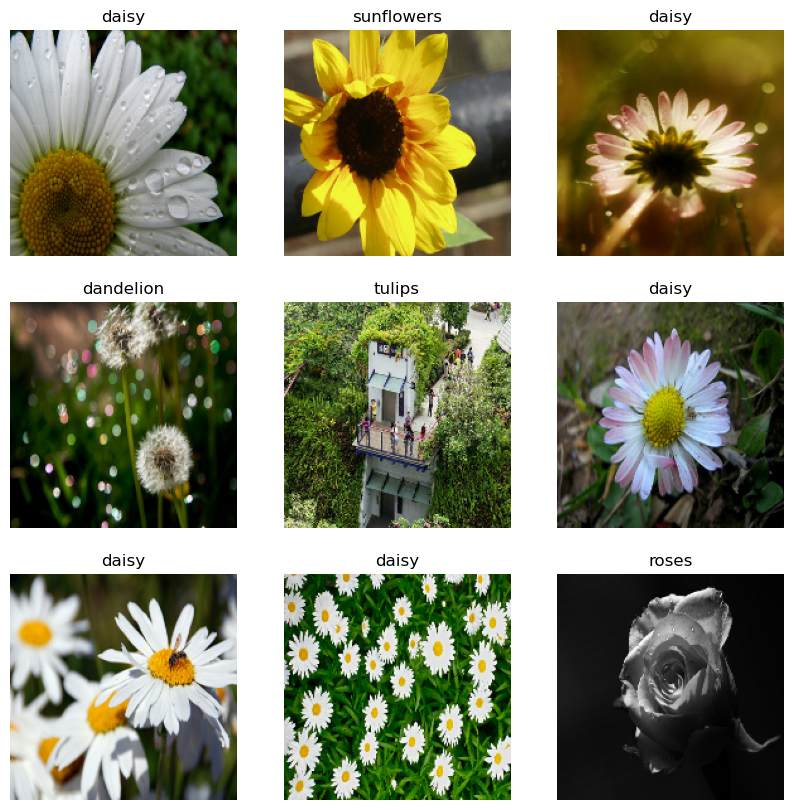

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Making a model

In [99]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
184/184 [==============================] - 5s 23ms/step - loss: 1.2664 - accuracy: 0.4717 - val_loss: 1.0703 - val_accuracy: 0.5899
Epoch 2/10
184/184 [==============================] - 4s 22ms/step - loss: 0.9496 - accuracy: 0.6253 - val_loss: 0.9365 - val_accuracy: 0.6172
Epoch 3/10
184/184 [==============================] - 4s 22ms/step - loss: 0.7107 - accuracy: 0.7323 - val_loss: 0.9387 - val_accuracy: 0.6594
Epoch 4/10
184/184 [==============================] - 4s 22ms/step - loss: 0.4513 - accuracy: 0.8389 - val_loss: 1.1148 - val_accuracy: 0.6594
Epoch 5/10
184/184 [==============================] - 4s 22ms/step - loss: 0.2606 - accuracy: 0.9162 - val_loss: 1.4045 - val_accuracy: 0.6362
Epoch 6/10
184/184 [==============================] - 4s 22ms/step - loss: 0.1583 - accuracy: 0.9510 - val_loss: 1.7021 - val_accuracy: 0.6253
Epoch 7/10
184/184 [==============================] - 4s 22ms/step - loss: 0.0899 - accuracy: 0.9714 - val_loss: 2.0310 - val_accuracy: 0.6226

In [137]:
def predict_image(img):
    class_names = train_ds.class_names
    img_4d=img.reshape(-1,180,180,3)
    prediction=model.predict(img_4d)[0]
    print("PREDICTION",prediction)
    return {class_names[i]:float(prediction[i]) for i in range(5)}

In [138]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 22ms/step
PREDICTION [3.3566188e-09 1.3195932e-16 1.8764546e-04 5.9471650e-11 9.9981242e-01]
1/1 [==============================] - 0s 20ms/step
PREDICTION [1.5520522e-01 8.4259450e-01 2.9866894e-06 2.1920416e-03 5.1978773e-06]
1/1 [==============================] - 0s 21ms/step
PREDICTION [6.6235036e-01 2.9353801e-02 8.2404578e-05 3.0295336e-01 5.2601588e-03]
Keyboard interruption in main thread... closing server.


In [109]:
1.18226836e-07>9.98303890e-01

False

In [119]:
np.argmax([7.8243391e-11 ,9.9877387e-01 ,3.8560140e-07,1.2247559e-03 ,9.1330577e-07])

1

Found 2572 images belonging to 5 classes.
Found 1098 images belonging to 5 classes.
Found 1098 images belonging to 5 classes.
Number of samples in the training set: 2572
Number of samples in the validation set: 1098
Number of samples in the test set: 1098
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


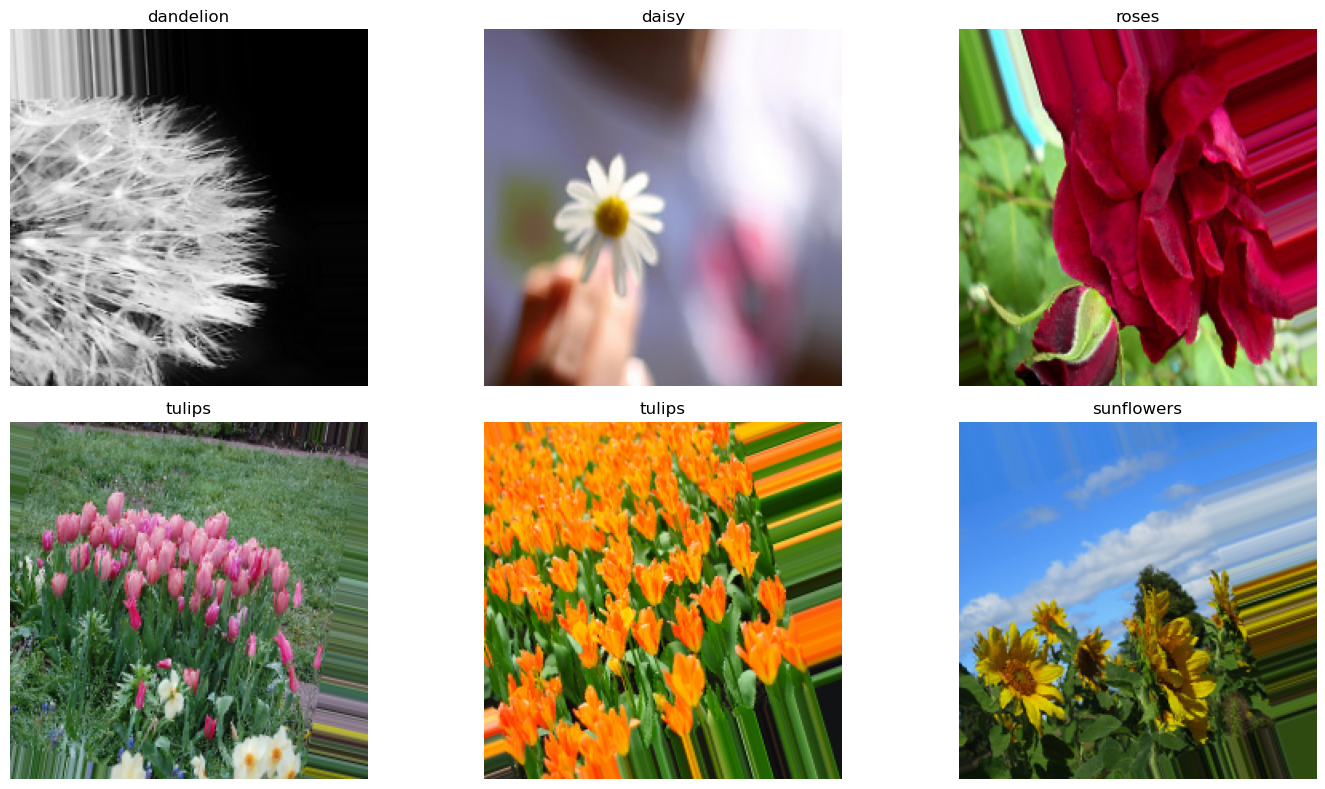

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Set the path to the folder containing the images
data_folder = "flower_photos/"

# Set the proportions for the split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Set the image size and batch size
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,  # randomly rotate images up to 20 degrees
    width_shift_range=0.2,  # randomly shift images horizontally up to 20% of the width
    height_shift_range=0.2,  # randomly shift images vertically up to 20% of the height
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zoom in and out of images
    horizontal_flip=True,  # randomly flip images horizontally
    validation_split=val_ratio+test_ratio  # set the validation and test split
)

# Create a generator for the training data
train_gen = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",  # set the generator to use the training split
    shuffle=True
)

# Create a generator for the validation data
val_gen = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",  # set the generator to use the validation split
    shuffle=True
)

# Create a generator for the test data
test_gen = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",  # set the generator to use the test split
    shuffle=True
)

# Print the number of samples in each split
print(f"Number of samples in the training set: {train_gen.samples}")
print(f"Number of samples in the validation set: {val_gen.samples}")
print(f"Number of samples in the test set: {test_gen.samples}")

## TO VISUALIZE
class_names = train_gen.class_indices
print(class_names)
class_names = list(class_names.keys())
print(class_names)
# Get a batch of images and labels from the generator
images, labels = next(train_gen)

# Plot the images and labels
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()
for i in range(6):
    axs[i].imshow(images[i])
    classes = labels[i].argmax()
    axs[i].set_title(class_names[classes])
    axs[i].axis("off")
plt.tight_layout()
plt.show()